## Summarize per-subject performance



In [19]:
import pickle
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns


datadir = Path('/Users/poldrack/data_unsynced/multitask/encoding_models')


In [92]:
# load results file

methods = ['ridgecv']

accuracy_df = {}
r2_scores_df = {}

for method in methods:
    accuracy_df['ridgecv'] = pd.read_csv(datadir / f'accuracy_df_{method}.csv')
    r2_scores_df['ridgecv'] = pd.read_csv(datadir / f'r2_scores_{method}.csv')
    

In [86]:
# summarize accuracy by subject

accuracy_by_subject = None
r2_scores_df = None

for subject, perf in performance.items():
    acc_values = np.array(list(perf[0].values()))
    acc_keys = list(perf[0].keys())
    
    if accuracy_by_subject is None:
        accuracy_by_subject = pd.DataFrame(acc_values.reshape((1, acc_values.shape[0])), columns=acc_keys, index=[subject])
    else:
        accuracy_by_subject = pd.concat((accuracy_by_subject,
                                       pd.DataFrame(acc_values.reshape((1, acc_values.shape[0])), columns=acc_keys, index=[subject])))
        
    r2_values = np.array(list(perf[1].values()))
    r2_values = r2_values.reshape((r2_values.shape[0]*2, 1))
    r2_keys_orig = list(perf[1].keys())
    #  need to duplicate these to correctly index the pairs of r2 scores
    pair_id = []
    map_id = []
    for k in r2_keys_orig:
        pair_id.append(k)
        pair_id.append(k)
        map_id.append(k[0])
        map_id.append(k[1])
    
    r2_subject = pd.Series(r2_values[:, 0]).to_frame('r2_score')
    r2_subject['subcode'] = subject
    r2_subject['pair_id'] = pair_id
    r2_subject['map_id'] = map_id
    
    if r2_scores_df is None:
        r2_scores_df = r2_subject
    else:
        r2_scores_df = pd.concat((r2_scores_df, r2_subject))
    
accuracy_by_subject['subcode'] = accuracy_by_subject.index
accuracy_by_subject_long_df = pd.melt(accuracy_by_subject, id_vars='subcode')


In [48]:
accuracy_by_subject_long_df.head()

,subcode,variable,value
0,sub-02,"(DigitJudgement, FingerSeq)",0
1,sub-03,"(DigitJudgement, FingerSeq)",0
2,sub-04,"(DigitJudgement, FingerSeq)",0
3,sub-06,"(DigitJudgement, FingerSeq)",0
4,sub-08,"(DigitJudgement, FingerSeq)",0


<AxesSubplot:ylabel='value'>

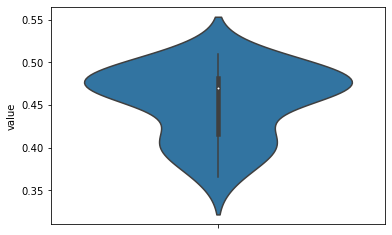

In [51]:

sns.violinplot(y='value', data=accuracy_by_subject_long_df.groupby('subcode').mean())

<AxesSubplot:ylabel='r2_score'>

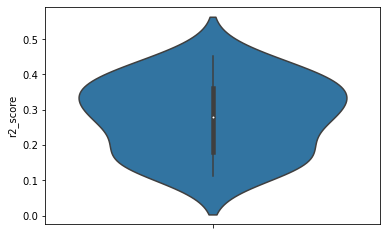

In [89]:
# summarize r2_score by subject

sns.violinplot(y='r2_score', data=r2_scores_df.groupby('subcode').mean())

In [90]:
accuracy_by_subject


,"(DigitJudgement, FingerSeq)","(DigitJudgement, FingerSimple)","(DigitJudgement, Go)","(DigitJudgement, HappyFaces)","(DigitJudgement, IntervalTiming)","(DigitJudgement, Math)","(DigitJudgement, MotorImagery)","(DigitJudgement, NoGo)","(DigitJudgement, Object2Back)","(DigitJudgement, Objects)",...,"(RespAltMed, SpatialMapEasy)","(RespAltMed, SpatialMapHard)","(RespAltMed, SpatialMapMed)","(ScrambledMotion, SpatialMapEasy)","(ScrambledMotion, SpatialMapHard)","(ScrambledMotion, SpatialMapMed)","(SpatialMapEasy, SpatialMapHard)","(SpatialMapEasy, SpatialMapMed)","(SpatialMapHard, SpatialMapMed)",subcode
sub-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,sub-02
sub-03,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,0,0,0,sub-03
sub-04,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,0,0,0,sub-04
sub-06,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,0,0,0,sub-06
sub-08,0,0,0,0,0,0,0,1,0,1,...,1,1,1,1,1,1,0,0,0,sub-08
sub-09,0,0,0,0,0,0,0,1,0,0,...,0,1,1,1,1,1,0,0,0,sub-09
sub-10,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,1,0,0,0,sub-10
sub-12,0,0,0,0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,sub-12
sub-14,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,1,1,1,0,1,sub-14
sub-15,0,0,0,0,0,0,0,1,0,0,...,0,1,1,1,1,1,0,0,0,sub-15
